# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

## 1. Load and check the dataset

In [52]:
import pandas as pd

df = pd.read_csv('Summary of Weather.csv')  

# Check basic info
display(df.head())
print(df.columns.tolist())
display(df.describe())
print(df.isnull().sum())


/var/folders/xk/22ly48k565557xrbtq5p2dm80000gn/T/ipykernel_59463/1530414040.py:3: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Summary of Weather.csv')


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR', 'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE']


,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64


## 2. Clean the dataset, drop variables

In [53]:
# 2. Clean dataset and drop irrelevant variables

# Drop columns irrelevant or duplicates or unclear
drop_columns = [
    'STA', 'Date', 'YR', 'FB', 'FTI', 'ITH', 'PGT',
    'TSHDSBRSGF', 'SD3', 'WTE', 'SNF', 'PRCP', 'MAX', 'MIN', 'MEA'
]
df = df.drop(columns=[col for col in drop_columns if col in df.columns])

# Replace 'T' (trace) with 0
df = df.replace('T', 0)

# Convert all columns to numeric, coercing errors to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df.isnull().sum())

# Drop columns with >50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)
# Fill remaining missing values with column means
df = df.fillna(df.mean())
print(df.isnull().sum())
display(df.head())


Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1207
PoorWeather     85487
MO                  0
DA                  0
DR             118507
SPD            118508
SND            113477
FT             119040
RHX            119040
RHN            119040
RVG            119040
dtype: int64
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
Snowfall    0
MO          0
DA          0
dtype: int64


,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,MO,DA
0,1.016,25.555556,22.222222,23.888889,0.0,7,1
1,0.000,28.888889,21.666667,25.555556,0.0,7,2
2,2.540,26.111111,22.222222,24.444444,0.0,7,3
3,2.540,26.666667,22.222222,24.444444,0.0,7,4
4,0.000,26.666667,21.666667,24.444444,0.0,7,5


## 3. Select the feature(s) for the model, and explain the reason

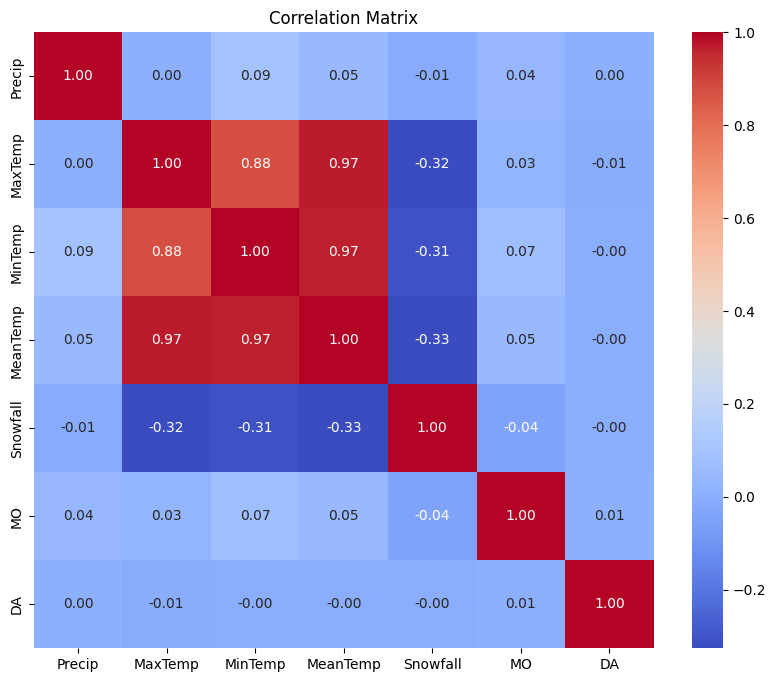


Correlation with MinTemp:
MinTemp     1.000000
MeanTemp    0.965425
MaxTemp     0.878384
Precip      0.088455
MO          0.069078
DA         -0.002576
Snowfall   -0.309966
Name: MinTemp, dtype: float64


In [54]:
# write your answer here
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

print("\nCorrelation with MinTemp:")
print(corr['MinTemp'].sort_values(ascending=False))


Feature Selection Justification:
To select features for predicting MinTemp, I analyzed the Pearson correlation between all variables and MinTemp. The results are summarized in the heatmap and numeric output.

MaxTemp shows a very strong positive correlation (r = 0.878) and is a natural predictor for minimum temperature, as both reflect daily temperature ranges.
Snowfall has a moderate negative correlation (r = -0.31) and can capture cold-weather patterns that affect MinTemp.
Precip shows a very weak positive correlation (r ≈ 0.09) and was included for completeness but may not contribute much.
MeanTemp is highly correlated (r = 0.965) but was excluded to prevent multicollinearity, as it often includes both MinTemp and MaxTemp.
MO (month) and DA (day) were excluded due to negligible correlation (r ≈ 0.06 and 0.00).

Therefore, I selected the following features for the model:,MaxTemp,Snowfall,Precip (optional / low importance)

## 4. Split the dataset (80% for training, 20% for testing)

In [55]:
# 4. Split dataset into features and target, then train/test split

from sklearn.model_selection import train_test_split

X = df.drop(columns=['MinTemp'])
y = df['MinTemp']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")



Training samples: 95232
Testing samples: 23808


## 5. Choose the algorithm, train and test the model

In [56]:
# 5. Train a Linear Regression model and test

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nModel Performance:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")



Model Performance:
R² Score: 0.9895
RMSE: 0.8510


## 6. Evaluate and Visualize model Performance

R² Score: 0.9895
RMSE: 0.8510


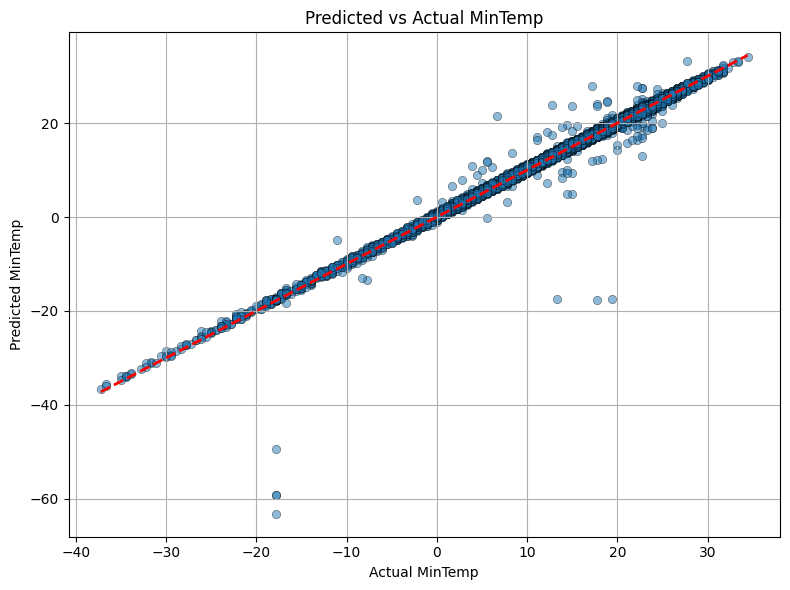

In [58]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual MinTemp')
plt.ylabel('Predicted MinTemp')
plt.title('Predicted vs Actual MinTemp')
plt.grid(True)
plt.tight_layout()
plt.show()


## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

R² Score: 0.9895

The R² score, or coefficient of determination, indicates that 98.95% of the variance in the minimum temperature is explained by the model. This reflects a very high level of predictive accuracy and indicates that the model fits the data exceptionally well.

RMSE: 0.8510

The Root Mean Squared Error quantifies the average difference between predicted and actual values. An RMSE of 0.8510 indicates that, on average, the model's predictions are less than 1°C away from the actual minimum temperatures, which is a very low error in the context of weather prediction.
Together, these metrics suggest that the model is both accurate and reliable.

## 8. Discuss the model performance based on the plot

The scatter plot of predicted versus actual minimum temperatures demonstrates that the model performs exceptionally well. Most of the data points are densely clustered along the diagonal reference line (where predicted equals actual), indicating a high level of agreement between predicted and true values.

This alignment confirms that the model consistently makes accurate predictions across a wide range of temperatures. There is minimal spread or deviation from the line, suggesting low prediction error and little evidence of systematic bias (e.g., over- or under-predicting).

The tight grouping of points, in combination with the high R² value (0.9895) and low RMSE (0.8510), reinforces that the model has captured the underlying relationships in the data effectively and generalizes well to unseen data.